In [1]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [2]:
 # Step 1: Load and preprocess the data
data = pd.read_excel("D:\\projects\\project 1st oil price predection\\DCOILWTICO (1).xls")

# Step 2: Preprocessing
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values('Date')

# Handle missing values
data = data.dropna()

# Convert negative prices to positive
data['Price'] = data['Price'].abs()


# Step: Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Price'] = scaler.fit_transform(data[['Price']])

In [3]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = data.drop('Price', axis=1)  # Features (excluding the 'Price' column)
y = data['Price']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()


C:\Users\Usee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [5]:
y_pred = model_fit.predict(start=X_test.index[0], end=X_test.index[-1])

C:\Users\Usee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Usee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [9]:
# Convert y_pred to a pandas Series with appropriate index
y_pred = pd.Series(y_pred, index=y_test.index)

# Remove NaN values from y_pred
y_pred = y_pred.dropna()

# Calculate RMSE and MSE
rmse = mean_squared_error(y_test.loc[y_pred.index], y_pred, squared=False)
mse = mean_squared_error(y_test.loc[y_pred.index], y_pred)

# Print the RMSE and MSE values
print("RMSE:", rmse)
print("MSE:", mse)


RMSE: 0.9935965746975398
MSE: 0.9872341532506838


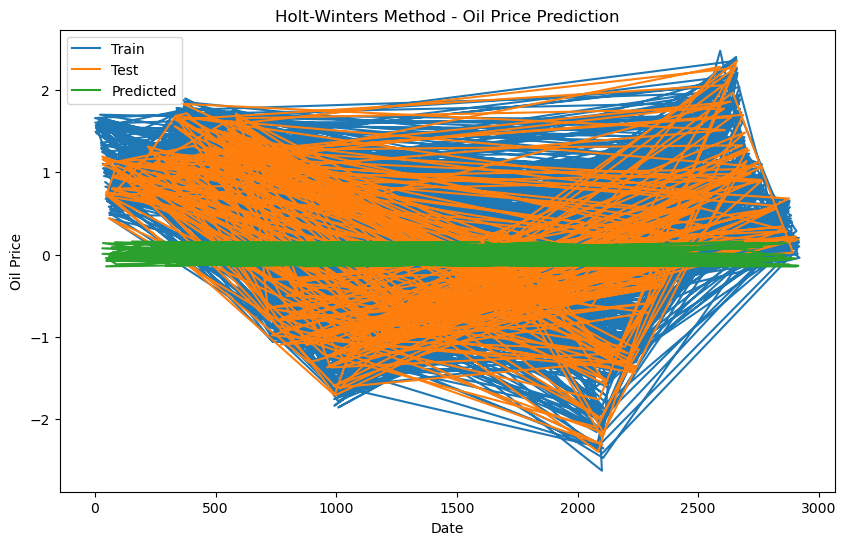

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(X_train.index, y_train, label='Train')
plt.plot(X_test.index[:len(y_pred)], y_test[:len(y_pred)], label='Test')
plt.plot(X_test.index[:len(y_pred)], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Holt-Winters Method - Oil Price Prediction')
plt.legend()
plt.show()

